In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("output/STATEWIDE_INTERGOV.csv").set_index("report_year")\
.join(pd.read_csv("output/STATEWIDE_ECS.csv").set_index("FYEAR"),how="outer")\
.join(pd.read_csv("output/STATEWIDE_ENROLLMENT.csv").set_index("report_year"),how="outer")\
.join(pd.read_csv("output/STATEWIDE_STAFFING.csv").set_index("report_year"),how="outer")\
.join(
    pd.read_csv(
        "output/STATEWIDE_STAFFING-General Education - Teachers and Instructors.csv"
    ).set_index("report_year"),how="outer",rsuffix=" Teachers")

df

,Inter_Gov_Rev,Payment,Count,FTE Count,FTE Count Teachers
2003,NaN,NaN,NaN,84725.5,36168.3
2004,NaN,1.454525e+09,NaN,85297.8,36352.0
2005,NaN,1.492784e+09,NaN,86857.7,36532.0
2006,NaN,1.546164e+09,NaN,88133.6,36856.4
2007,2.690235e+09,1.553964e+09,NaN,90555.5,37125.6
2008,4.238110e+09,1.712452e+09,574848.0,91028.2,37187.5
2009,3.046361e+09,1.788248e+09,571046.0,90908.7,37326.7
2010,2.860787e+09,1.796968e+09,567792.0,89743.3,36768.3
2011,2.912384e+09,1.800577e+09,564499.0,89814.5,36174.7
2012,3.233563e+09,1.801083e+09,558377.0,89734.5,36144.6


In [40]:
df["enrollment"]

2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008    574848.0
2009    571046.0
2010    567792.0
2011    564499.0
2012    558377.0
2013    554804.0
2014    549877.0
2015    546347.0
2016    541815.0
2017    538893.0
2018    535025.0
Name: enrollment, dtype: float64

In [42]:
df["enrollment"].loc[2018] - df["enrollment"].loc[2008]

-39823.0

In [45]:
(535025. - 574848.) / 574848.

-0.06927570418615007

In [43]:
(df["enrollment"].loc[2018] - df["enrollment"].loc[2008]) / df["enrollment"].loc[2008]

-0.06927570418615007

In [46]:
df["teachers_fte"]

2003    36168.3
2004    36352.0
2005    36532.0
2006    36856.4
2007    37125.6
2008    37187.5
2009    37326.7
2010    36768.3
2011    36174.7
2012    36144.6
2013    36238.3
2014    36432.8
2015    36252.8
2016    36298.2
2017    36205.5
2018    35790.2
Name: teachers_fte, dtype: float64

In [47]:
df["fte"]

2003    84725.5
2004    85297.8
2005    86857.7
2006    88133.6
2007    90555.5
2008    91028.2
2009    90908.7
2010    89743.3
2011    89814.5
2012    89734.5
2013    90750.7
2014    92287.7
2015    94655.2
2016    96113.7
2017    94369.7
2018    94724.7
Name: fte, dtype: float64

In [57]:
df["grants"] / (1000 * 1000)

2003            NaN
2004    1454.524550
2005    1492.783524
2006    1546.163605
2007    1553.963572
2008    1712.452116
2009    1788.247613
2010    1796.967608
2011    1800.577456
2012    1801.082863
2013    1841.623245
2014    1904.788221
2015    1946.314217
2016    1973.126810
2017    1937.978994
2018    1854.062555
Name: grants, dtype: float64

In [60]:
(df["grants"].loc[2017] - df["grants"].loc[2016]) #/ df["grants"].loc[2016]

-35147816.0

In [61]:
-35147816 / (1854.062555 * 1000 * 1000)

-0.01895718993149074

In [64]:
-35147816. * 18. / 1000.

-632660.688

In [58]:
(df["grants"].loc[2018] - df["grants"].loc[2016])

-119064255.0

In [55]:
# fte drop 2016 to 2107
print (94369.7 - 96113.7 )
print (94369.7 - 96113.7 ) / 96113.7

-1744.0
-0.0181451759739


In [48]:
(94724.7 - 91028.2) / 91028.2

0.04060829501187544

In [49]:
(94724.7 - 91028.2)

3696.5

In [3]:
df.columns = "intergov", "grants", "enrollment", "fte", "teachers_fte"

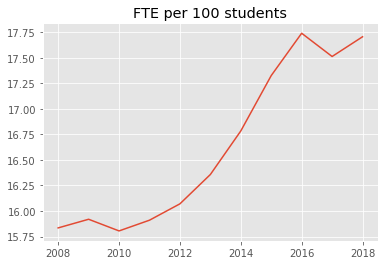

In [4]:
(df["fte"] * 100 / df["enrollment"]).plot(title="FTE per 100 students")

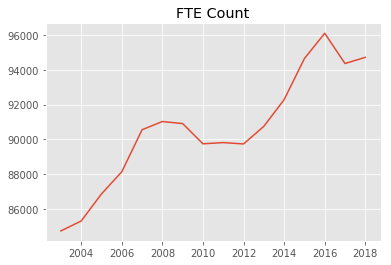

In [5]:
(df["fte"]).plot(title="FTE Count")

In [6]:
df["fte_diff"] = df["fte"].diff()

In [7]:
df.sort_values(by="fte_diff",ascending=True)

,intergov,grants,enrollment,fte,teachers_fte,fte_diff
2017,NaN,1.937979e+09,538893.0,94369.7,36205.5,-1744.0
2010,2.860787e+09,1.796968e+09,567792.0,89743.3,36768.3,-1165.4
2009,3.046361e+09,1.788248e+09,571046.0,90908.7,37326.7,-119.5
2012,3.233563e+09,1.801083e+09,558377.0,89734.5,36144.6,-80.0
2011,2.912384e+09,1.800577e+09,564499.0,89814.5,36174.7,71.2
2018,NaN,1.854063e+09,535025.0,94724.7,35790.2,355.0
2008,4.238110e+09,1.712452e+09,574848.0,91028.2,37187.5,472.7
2004,NaN,1.454525e+09,NaN,85297.8,36352.0,572.3
2013,3.248339e+09,1.841623e+09,554804.0,90750.7,36238.3,1016.2
2006,NaN,1.546164e+09,NaN,88133.6,36856.4,1275.9


In [8]:
#!pip install humanize
!mkdir -p figures/for-story/good/

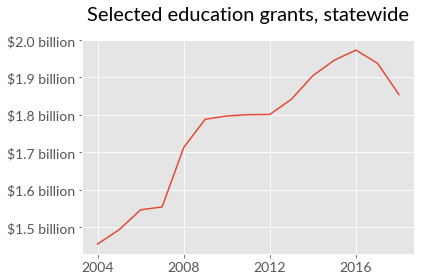

In [9]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Lato']
rcParams['axes.titlepad'] = 20 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
#matplotlib.rc('suptitle', fontsize=20) 
TITLE_FONT_SIZE=20

import matplotlib.ticker as mtick
import humanize

def style_chart(ax, 
                yfmt=lambda x, _: "$%s" % humanize.intword(x),
                xfmt=None,
                rotation=0
               ):
    
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Lato']
    rcParams['axes.titlepad'] = 20 
    matplotlib.rc('xtick', labelsize=14) 
    matplotlib.rc('ytick', labelsize=14) 

    ax = ax#.plot(fontsize=13,figsize=(6,4))
    
    ytick = mtick.FuncFormatter(yfmt)
    ax.yaxis.set_major_formatter(ytick) 
    
    if xfmt is not None:
        xtick = mtick.FuncFormatter(xfmt)
        ax.xaxis.set_major_formatter(xtick)
    #    plt.xticks(rotation=25)
    ax.xaxis.set_tick_params(rotation=rotation)
    ax.plot(fontsize=TITLE_FONT_SIZE)

    ax.set_title(ax.get_title(),fontsize=TITLE_FONT_SIZE)

    plt.tight_layout()

    return ax

plt.close()

#ax = df["grants"].sort_index()#.plot()#fontsize=15)
style_chart(df["grants"].sort_index().plot(
    xticks=[2004, 2008, 2012, 2016],
    title="Major education grants, statewide"
))

plt.tight_layout()
plt.gcf().savefig("figures/for-story/good/1-total-grants.png",bbox_inches='tight')

In [10]:
#ax = df["grants"].sort_index().plot()#fontsize=15)
# style_chart(ax, "Selected education grants, statewide")

# #fmt = '${x:,.0f}'
# #tick = mtick.StrMethodFormatter(fmt)
# #fmt = lambda x, _: "$%s" % humanize.intword(x)


# #tick = mtick.FuncFormatter(fmt)
# #ax.yaxis.set_major_formatter(tick) 
# #plt.xticks(rotation=25)
# # ax.set_title("Selected education grants, statewide",fontsize=19)
# # plt.xticks([2004, 2008, 2012, 2016])
# #plt.show()

# style_chart(ax, "Selected education grants, statewide")
# #plt.gcf().savefig("figures/for-story/good/1-total-grants.png")

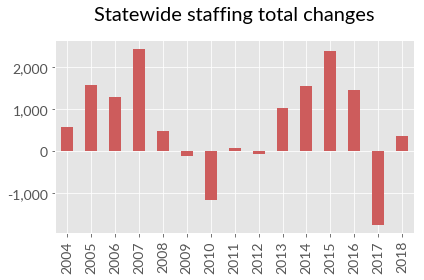

In [11]:
style_chart(df[df.index.map(lambda x: x > 2003)]["fte_diff"].plot.bar(
    color="indianred",
    yticks=[-1000,0,1000,2000],
    title="Statewide staffing total changes"
),
            rotation=90,
           yfmt=lambda x, _: humanize.intcomma(x))

plt.gcf().savefig("figures/for-story/good/2-fte-changes-bars.png",bbox_inches='tight')

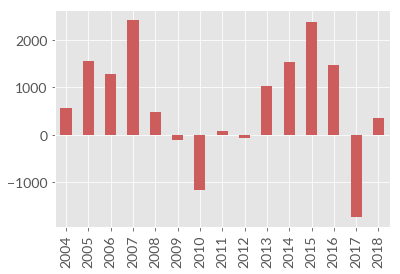

In [12]:
df["fte_diff"].plot.bar(color="indianred")
plt.close()
df[df.index.map(lambda x: x > 2003)]["fte_diff"].plot.bar(
    color="indianred",
    #yticks=[-2000,-1000,0,1000,2000]
)

Text(0.5,1,'Staffing changs, statewide')

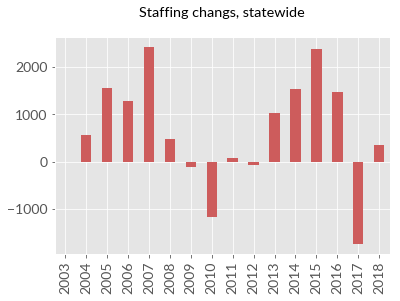

In [13]:
ax = df["fte_diff"].plot.bar(
    color="indianred",
    title="Statewide staffing changes")
ax.set_title("Staffing changs, statewide")#, font_size=FONT_SIZE)
#style_chart(df["fte_diff"].plot.bar(color="indianred"))

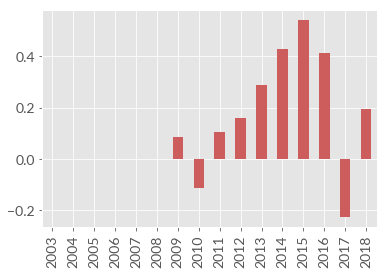

In [14]:
df["fte_per_student"] = df["fte"] * 100 / df["enrollment"]
df["fte_per_student_diff"] = df["fte_per_student"].diff()
df["fte_per_student_diff"].plot.bar(color="indianred")

In [15]:
df["teachers_per_student"] = df["teachers_fte"] * 100 / df["enrollment"]

In [16]:
df

,intergov,grants,enrollment,fte,teachers_fte,fte_diff,fte_per_student,fte_per_student_diff,teachers_per_student
2003,NaN,NaN,NaN,84725.5,36168.3,NaN,NaN,NaN,NaN
2004,NaN,1.454525e+09,NaN,85297.8,36352.0,572.3,NaN,NaN,NaN
2005,NaN,1.492784e+09,NaN,86857.7,36532.0,1559.9,NaN,NaN,NaN
2006,NaN,1.546164e+09,NaN,88133.6,36856.4,1275.9,NaN,NaN,NaN
2007,2.690235e+09,1.553964e+09,NaN,90555.5,37125.6,2421.9,NaN,NaN,NaN
2008,4.238110e+09,1.712452e+09,574848.0,91028.2,37187.5,472.7,15.835177,NaN,6.469101
2009,3.046361e+09,1.788248e+09,571046.0,90908.7,37326.7,-119.5,15.919681,0.084503,6.536549
2010,2.860787e+09,1.796968e+09,567792.0,89743.3,36768.3,-1165.4,15.805665,-0.114016,6.475664
2011,2.912384e+09,1.800577e+09,564499.0,89814.5,36174.7,71.2,15.910480,0.104815,6.408284
2012,3.233563e+09,1.801083e+09,558377.0,89734.5,36144.6,-80.0,16.070594,0.160114,6.473153


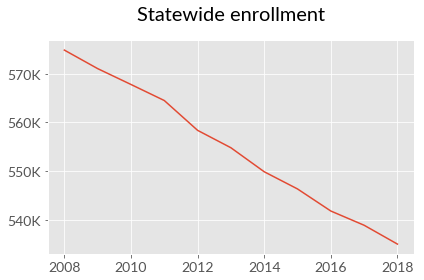

In [17]:
plt.close()

style_chart(df["enrollment"].plot(title="Statewide enrollment"),
           yfmt = lambda x, _: "%dK" % (x / 1000))

plt.gcf().savefig("figures/for-story/good/3-enrollment-totals.png",bbox_inches='tight')

In [18]:
df["fte_per_student"]

2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007          NaN
2008    15.835177
2009    15.919681
2010    15.805665
2011    15.910480
2012    16.070594
2013    16.357254
2014    16.783335
2015    17.325107
2016    17.739210
2017    17.511769
2018    17.704724
Name: fte_per_student, dtype: float64

In [37]:
17.739210 - 17.511769

0.2274409999999989

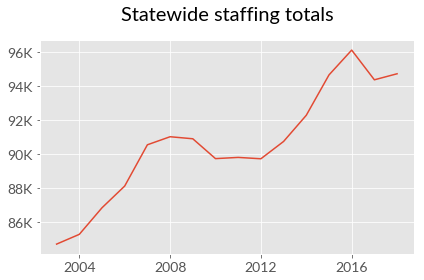

In [19]:
plt.close()

style_chart(df["fte"].plot(title="Statewide staffing totals",
                          xticks=[2004,2008,2012,2016]),
           yfmt = lambda x, _: "%dK" % (x / 1000))

plt.gcf().savefig("figures/for-story/good/4.2-staffing-totals.png",bbox_inches='tight')

In [20]:
df["fte_per_student"]

2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007          NaN
2008    15.835177
2009    15.919681
2010    15.805665
2011    15.910480
2012    16.070594
2013    16.357254
2014    16.783335
2015    17.325107
2016    17.739210
2017    17.511769
2018    17.704724
Name: fte_per_student, dtype: float64

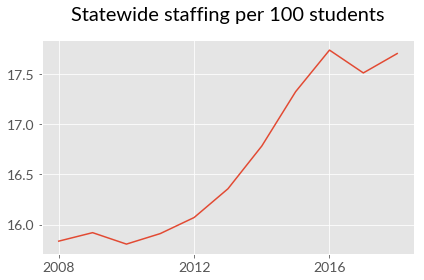

In [21]:
plt.close()

style_chart(
    df["fte_per_student"].plot(title="Statewide staffing per 100 students",
                xticks=[2004,2008,2012,2016]),
           yfmt = lambda x, _: "%0.1f" % x)

plt.gcf().savefig("figures/for-story/good/4.1-staffing-per-100.png",bbox_inches='tight')

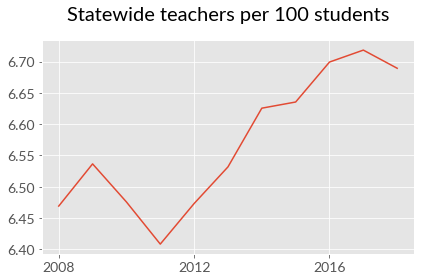

In [22]:
plt.close()

style_chart(
    df["teachers_per_student"].plot(title="Statewide teachers per 100 students",
                xticks=[2004,2008,2012,2016]),
           yfmt = lambda x, _: "%0.2f" % x)

plt.gcf().savefig("figures/for-story/good/4.3-teacher-staffing-per-100-2.png",bbox_inches='tight')

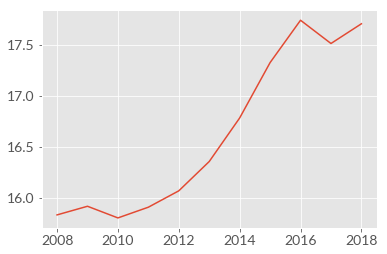

In [23]:
df["fte_per_student"].plot()

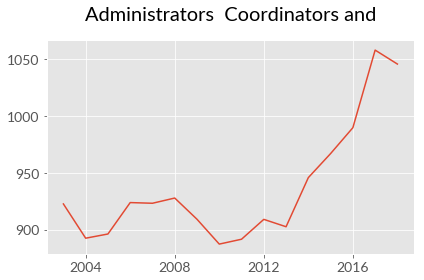

In [24]:
def small_nums(x):
    if x < 1000: return int(x)
    return "%0.1fK" % (x / 1000)

import os 


def staffing_category_plot(fname, add_to_ax=None):
    
    ret = pd.read_csv(fname).set_index("report_year")#.sort_index()

    ret = ret.plot(
        xticks=[2004,2008,2012,2016],
        legend=False,
        ax=add_to_ax,
        title= " ".join(os.path.basename(fname).replace("STATEWIDE_STAFFING-","").split(" ")[:4])
    )
    ret.xaxis.label.set_visible(False)
    return ret

ax = staffing_category_plot("output/STATEWIDE_STAFFING-Administrators  Coordinators and Department Chairs - District Central Office.csv")

style_chart(
    ax,
    yfmt=lambda x, _: humanize.apnumber(round(int(x)))
)



In [101]:
short_titles = {
	"General Education - Paraprofessional Instructional Assistants.csv":"Paras",
	"Instructional Specialists Who Support Teachers.csv":"Instr. support",
	"Counselors  Social Workers  and School Psychologists.csv":"Counselors",
	"Library-Media - Support Staff.csv":"Library support",
	"General Education - Teachers and Instructors.csv":"Teachers",
	"Other Staff Providing Non-Instructional Services-Support.csv":"Non-instructional",
	"Administrators  Coordinators and Department Chairs - District Central Office.csv":"Dist. admins",
	"Administrators  Coordinators and Department Chairs - School Level.csv":"Sch. admins",
	"Library-Media - Specialists (Certified).csv":"Lib. specialists",
	"Special Education - Teachers and Instructors.csv":"Special Ed.",
	"School Nurses.csv":"Nurses",
	"Special Education - Paraprofessional Instructional Assistants.csv":"Special Ed. paras",
}

In [102]:
#fig, axs = plt.subplots(6, 2,sharex=True,figsize=(4,12))

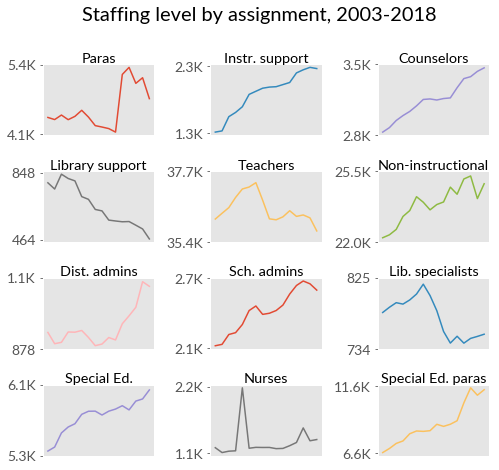

In [103]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Lato']
rcParams['axes.titlepad'] = 2 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 


#rcParams['axes.titlepad'] = 2

cols = 2
rows = 12 / cols

col = 0
row = 0

titles = []
staffing_frames = []
for f in os.listdir("output/"):
    if not f.startswith("STATEWIDE_STAFFING-"):
        continue
    
    titles.append(f.replace("STATEWIDE_STAFFING-",""))
    fpath = os.path.join("output",f)
    tmpdf = pd.read_csv(fpath).set_index("report_year")
    tmpdf.columns = [f]
    staffing_frames.append(tmpdf)
    
#     ax = staffing_category_plot(
#         fpath,
#         add_to_ax=axs[row, col]
#     )

#     style_chart(
#         ax,
#         yfmt=lambda x, _: humanize.apnumber(round(int(x)))
#     )
    
#     col += 1
#     print "TICK"
#     if col >= cols:
#         print "NEXT"
#         col = 0
#         row += 1
        
#     #ax.close()
#     plt.close()


axs = pd.concat(staffing_frames,axis=1).plot(
    subplots=True,
    figsize=(8,8),
    layout=(4,3),
    legend=False,
    grid=False,
)
plt.subplots_adjust(
    wspace=0.5, 
    hspace=0.5
)

i = 0
for row in axs:
    for cell in row:
        cell.set_title(short_titles[titles[i]])
        i += 1
        ytick = mtick.FuncFormatter(lambda x, i: small_nums(x))
        cell.yaxis.set_major_formatter(ytick) 
        ln = cell.get_lines()
        min_max = [ln[0].get_data()[1].min() * 0.99,
                   ln[0].get_data()[1].max() * 1.01]
        cell.set_yticks(min_max)
        #cell.set_xticks(None)
        cell.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
        cell.xaxis.label.set_visible(False)
    
plt.suptitle("Staffing level by assignment, 2003-2018", fontsize=TITLE_FONT_SIZE)
plt.gcf().savefig("figures/for-story/good/5-total-FTE-by-category.png",bbox_inches='tight')
#plt.gcf()

In [104]:
!open .

In [28]:
# print ("{")
# for t in titles:
#     print "\t\"%s\":\"\"," %t
# print ("}")


In [29]:
combined = pd.read_csv("output/5_combined.csv")

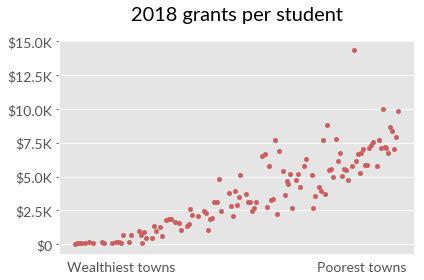

In [30]:
combined["grants_change"] = combined["Grant Payments"].diff()
combined["grants_per_student"] = combined["Grant Payments"] / combined["EDSIGHT_ENROLLMENT"]
combined["grants_per_student_change"] = combined["grants_per_student"].diff()
combined["grants_per_student_change_2"] = combined["grants_per_student"].diff(2)

ax = combined[combined['report_year'] == 2018].plot.scatter(
    "wealth_rank",
    "grants_per_student",
    color="indianred",
    xticks=[25,150],
)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

ax.xaxis.grid(False)

ax.xaxis.set_ticks_position('none') 
ax.set_title("2018 grants per student")

def poorest_richest(x, _):
    if int(x) == 25: 
        return "Wealthiest towns"
    if int(x) == 150: 
        return "Poorest towns"
    return None
style_chart(ax,yfmt = lambda x,_: '$%s' % small_nums(x),
            rotation=None,
            xfmt=poorest_richest)

plt.tight_layout()
plt.gcf().savefig("figures/for-story/good/6-grants-per-student-2018-2.png",bbox_inches='tight')

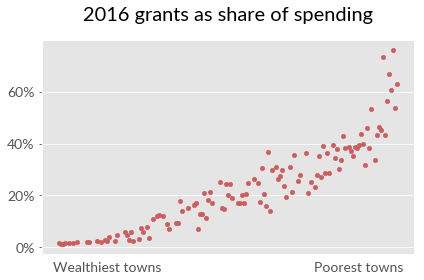

In [31]:
combined["grants_per_budget"] = (combined["Grant Payments"] * 100) /  combined["Education spending"]

plt.close()
ax = combined[combined['report_year'] == 2016].plot.scatter(
    "wealth_rank",
    "grants_per_budget",
    color="indianred",
    xticks=[25,150],
)

ax.xaxis.label.set_visible(False)
ax.xaxis.set_ticks_position('none') 

ax.yaxis.label.set_visible(False)
ax.xaxis.grid(False)

ax.set_title("2016 grants as share of spending")

def poorest_richest(x, _):
    if int(x) == 25: 
        return "Wealthiest towns"
    if int(x) == 150: 
        return "Poorest towns"
    return None

style_chart(ax,yfmt = lambda x,_: '%s' % (str(int(round(x))) + "%"),
            rotation=None,
            xfmt=poorest_richest)


plt.tight_layout()
plt.gcf().savefig("figures/for-story/good/7-grants-per-budget-2018-2.png",bbox_inches='tight')

In [36]:
combined[combined['report_year'] == 2016][[
    "City",
    "wealth_rank",
    "grants_per_budget",
]].sort_values(by="wealth_rank")

,City,wealth_rank,grants_per_budget
910,GREENWICH,1.0,1.870013
1422,NEW CANAAN,2.0,1.301714
557,DARIEN,3.0,1.295361
2522,WESTPORT,4.0,1.575874
2388,WASHINGTON,5.0,NaN
2505,WESTON,6.0,1.613996
1899,ROXBURY,7.0,NaN
2573,WILTON,8.0,1.687752
1931,SALISBURY,9.0,NaN
1870,RIDGEFIELD,10.0,2.087154


,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,grants_change
0,ANDOVER,2002,30.3,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN
5,ANDOVER,2007,60.9,NaN,23.8,NaN,True,7507964.0,2438728.0,645.40,NaN,108.0,NaN
6,ANDOVER,2008,58.0,347.0,25.3,NaN,True,8829049.0,3810247.0,642.14,NaN,108.0,NaN
7,ANDOVER,2009,59.4,334.0,25.3,NaN,True,8056856.0,2720551.0,641.76,NaN,108.0,NaN
8,ANDOVER,2010,60.0,336.0,26.3,NaN,True,7844581.0,2378006.0,631.35,NaN,108.0,NaN
9,ANDOVER,2011,59.7,334.0,26.3,NaN,True,8009858.0,2431822.0,636.48,NaN,108.0,NaN


In [65]:
# How often did funding go up and down, pre- and post- 2016

In [94]:
combined = pd.read_csv("output/5_combined.csv").set_index(["City","report_year"])

In [95]:
combined["grants_change"] = combined.groupby(level=0)["Grant Payments"].diff()

In [96]:
def increase_odds(tmpdf):
    
    rows = len(tmpdf)
    cut_years = len(tmpdf[tmpdf["grants_change"] < 0])
    hike_years = len(tmpdf[tmpdf["grants_change"] > 0])
    zero_years = len(tmpdf[tmpdf["grants_change"] == 0])
    null_years = len(tmpdf[tmpdf["grants_change"].isnull()])
    
    print rows
    print cut_years
    print hike_years
    print zero_years
    print rows - cut_years - hike_years - zero_years - null_years
    
    print
    print (float(hike_years) / float(rows - null_years))

In [98]:
increase_odds(combined[combined.index.map(lambda x: x[1] < 2017)])

2415
309
1150
5
0

0.785519125683


In [99]:
increase_odds(combined[combined.index.map(lambda x: x[1] >= 2017)])

290
217
27
0
0

0.110655737705


In [100]:
combined

FTE Count  EDSIGHT_ENROLLMENT  Teacher FTE Count  \
City       report_year                                                     
ANDOVER    2002              30.3                 NaN                NaN   
           2003              62.2                 NaN               23.6   
           2004              62.2                 NaN               23.8   
           2005              60.6                 NaN               25.8   
           2006              59.6                 NaN               24.8   
           2007              60.9                 NaN               23.8   
           2008              58.0               347.0               25.3   
           2009              59.4               334.0               25.3   
           2010              60.0               336.0               26.3   
           2011              59.7               334.0               26.3   
           2012              57.6               314.0               25.2   
           2013              56.6               315.0               24.7   
           2014              56.6               299.0               24.7   
           2015              52.1               275.0               19.7   
           2016              54.3               250.0               22.8   
           2017              45.3               225.0               17.8   
           2018              46.3               204.0               19.8   
ANSONIA    2002             112.1                 NaN                NaN   
           2003             314.2                 NaN              136.8   
           2004             346.9                 NaN              141.5   
           2005             363.1                 NaN              150.7   
           2006             368.7                 NaN              146.0   
           2007             489.8                 NaN              147.0   
           2008             391.9              2743.0              148.0   
           2009             404.5              2722.0              152.0   
           2010             373.2              2738.0              143.8   
           2011             399.6              2627.0              147.0   
           2012             389.6              2526.0              142.0   
           2013             376.7              2425.0              139.6   
           2014             391.7              2338.0              145.0   
...                           ...                 ...                ...   
WOODBRIDGE 2016             131.6               775.0               58.0   
           2017             133.1               780.0               59.5   
           2018             131.6               836.0               60.0   
WOODBURY   2007               NaN                 NaN                NaN   
           2008               NaN                 NaN                NaN   
           2009               NaN                 NaN                NaN   
           2010               NaN                 NaN                NaN   
           2011               NaN                 NaN                NaN   
           2012               NaN                 NaN                NaN   
           2013               NaN                 NaN                NaN   
           2014               NaN                 NaN                NaN   
           2015               NaN                 NaN                NaN   
           2016               NaN                 NaN                NaN   
WOODSTOCK  2002              73.0                 NaN                NaN   
           2003             163.7                 NaN               60.0   
           2004             162.9                 NaN               60.0   
           2005             152.7                 NaN               58.0   
           2006             158.7                 NaN               60.0   
           2007             154.2                 NaN               57.0   
           2008             170.7               951.0               59.0